# Importing Pakages

In [71]:
#pip install pandasql
#pip install wordcloud
#pip install sorted-months-weekdays
#pip install sort-dataframeby-monthorweek

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3419 sha256=9e7c512d3ad393f3bb5088eda26348c8f74b2750c04ce715a81e541f5688b878
  Stored in directory: c:\users\raj_d\appdata\local\pip\cache\wheels\94\66\fa\f621d4b2c9c3eeb09cbd33697f4bb60bfe9d3d900d3a59329d
Successfully built sort-dataframeby-monthorweek
Note: you may need to restart the kernel to use updated packages.


# Importing libraries

In [3]:
# Import the required libraries

import pandas as pd
import numpy as np

import re
import regex
import datetime as date
from datetime import datetime
from collections import Counter

import sqlite3
import pandasql as ps

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
from wordcloud import WordCloud

from scipy.stats import norm
import statistics


from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *

from pandas import ExcelWriter
from pandas import ExcelFile

import psycopg2
import psycopg2.extras

# Data Frames for the sheets in the datasets

In [4]:
excel_filename = "HospitalDatabase.xlsx"
df_Patients=pd.read_excel(excel_filename, "Patients")
df_EDVisits = pd.read_excel(excel_filename, "EDVisits")
df_AmbulatoryVisits = pd.read_excel(excel_filename, "AmbulatoryVisits")
df_ReAdmissionRegistry = pd.read_excel(excel_filename, "ReAdmissionRegistry")
df_Discharges = pd.read_excel(excel_filename, "Discharges")
df_Providers = pd.read_excel(excel_filename, "Providers")
df_EDUnique = pd.read_excel(excel_filename, "EDUnique")

## 1. Show all the Male, Black/African-American, above the age of 55 who visit the hospital.

In [4]:
workbook_url = 'HospitalDatabase.xlsx'
Patients_df = pd.read_excel(workbook_url,sheet_name='Patients')
Patients_df
Patients_df['DateOfBirth'] = pd.to_datetime(Patients_df['DateOfBirth'])
Patients_df['Year'] = Patients_df['DateOfBirth'].dt.year
Patients_df['Age'] = 2022 - Patients_df['Year']
Patients_df

df = Patients_df.loc[(Patients_df['Age'] > 55) & 
              (Patients_df['Race'] == 'Black/African-American') & (Patients_df['Gender']== 'Male')]
df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Year,Age
81,83,Charmine,Bernardt,1964-07-28 15:49:41.229,Male,Black/African-American,Spanish,1964,58
84,86,Aurore,Harrild,1964-07-05 10:50:46.122,Male,Black/African-American,Spanish,1964,58
89,46,Ilise,de,1965-10-20 06:23:48.785,Male,Black/African-American,Spanish,1965,57
96,97,Skippie,Breagan,1966-12-01 19:45:47.561,Male,Black/African-American,Spanish,1966,56
101,102,Gipsy,Frankton,1964-06-13 06:52:25.324,Male,Black/African-American,Spanish,1964,58
...,...,...,...,...,...,...,...,...,...
927,928,Giovanni,McCluney,1961-08-18 15:37:17.632,Male,Black/African-American,English,1961,61
928,929,Ediva,MacTeague,1963-04-05 17:42:15.238,Male,Black/African-American,English,1963,59
931,932,Kellsie,MacTeague,1966-06-28 14:49:50.758,Male,Black/African-American,English,1966,56
935,936,Philippa,Slocum,1963-07-21 21:19:53.583,Male,Black/African-American,English,1963,59


### Answer : Statiscally Out of the total no of 1000 Patients, 97 patients are Male, Black/African-American, above the age of 55 who visit the hospital.

## 2. Display the total count of patients with respest to service and gender separately.

In [5]:
df=pd.read_csv('HospitalDatabase-ReAdmissionRegistry.csv')
df['Service'].value_counts()

General Medicine    263
ICU                 151
Hospitalist         101
Cardiology           95
Neurology            65
Orthopeadics         45
Name: Service, dtype: int64

In [6]:
df=pd.read_csv('HospitalDatabase-Pateint.csv')
df['Gender'].value_counts()

Male      537
Female    408
Name: Gender, dtype: int64

## 3. For each diagnosis display the mortality rate.

In [27]:
df=df_Discharges.groupby('PrimaryDiagnosis')['DischargeDisposition'].apply(lambda x: (x=='Expired').sum()).reset_index(name='count')
df

,PrimaryDiagnosis,count
0,AMI,6
1,Afib,4
2,Broken Leg,3
3,Diabetes,9
4,Fever,4
5,Flu,11
6,Heart Failure,16
7,Hip Fracture,3
8,Hypertension,16
9,Kidney Failure,2


In [11]:
# Calculating mortality rate by diagnosis
df=pd.read_csv('HospitalDatabase-Discharges.csv')
Diagnosis= df["PrimaryDiagnosis"].unique()
count=int(len(Diagnosis))
i=0
while (i < count):
    df1=df.loc[(df['DischargeDisposition'] == "Expired") & (df['PrimaryDiagnosis'] == Diagnosis[i])]
    df2=df.loc[(df['PrimaryDiagnosis'] == Diagnosis[i])]
    exp_num = int(len(df1))
    total_num= int(len(df2))
    mortality= exp_num/total_num
    print(" Primary Diagnosis: ",Diagnosis[i],"\n","Mortality: ",mortality,"\n")
    i+=1

 Primary Diagnosis:  AMI 
 Mortality:  0.125 

 Primary Diagnosis:  Broken Leg 
 Mortality:  0.3333333333333333 

 Primary Diagnosis:  Kidney Failure 
 Mortality:  0.1 

 Primary Diagnosis:  Afib 
 Mortality:  0.36363636363636365 

 Primary Diagnosis:  Flu 
 Mortality:  0.1375 

 Primary Diagnosis:  Hypertension 
 Mortality:  0.32 

 Primary Diagnosis:  Fever 
 Mortality:  0.21052631578947367 

 Primary Diagnosis:  Pneumonia 
 Mortality:  0.0903954802259887 

 Primary Diagnosis:  Heart Failure 
 Mortality:  0.20512820512820512 

 Primary Diagnosis:  Spinal Cord Injury 
 Mortality:  1.0 

 Primary Diagnosis:  Stroke 
 Mortality:  0.10294117647058823 

 Primary Diagnosis:  Knee Replacement 
 Mortality:  0.08695652173913043 

 Primary Diagnosis:  Laceration 
 Mortality:  0.06896551724137931 

 Primary Diagnosis:  Hip Fracture 
 Mortality:  0.13043478260869565 

 Primary Diagnosis:  Diabetes 
 Mortality:  0.140625 

 Primary Diagnosis:  Pain 
 Mortality:  0.14285714285714285 

 Primary Dia

## 4. Displaying average LOS based on Service and Primary Diagnosis with a scatter plot.

In [7]:
%matplotlib inline
df=pd.read_csv('HospitalDatabase-Discharges.csv')
df
pd.pivot_table(df,index=['Service','PrimaryDiagnosis'],values='ExpectedLOS',aggfunc='mean',margins=True)

ExpectedLOS
Service          PrimaryDiagnosis               
Cardiology       AMI                   12.414202
                 Afib                  13.162920
                 Broken Leg             3.911826
                 Flu                    3.970428
                 Heart Failure         13.014044
                 Kidney Failure         6.580273
General Medicine Broken Leg             3.368132
                 Diabetes               5.665298
                 Fever                  6.803796
                 Flu                    6.141753
                 Hypertension           5.369365
                 Kidney Failure         5.943163
                 Laceration             6.771154
                 Pneumonia              6.140270
                 Stroke                 7.173333
Hospitalist      AMI                   13.828290
                 Broken Leg             7.125069
                 Diabetes               7.874359
                 Fever                  8.865651
                 Flu                    7.033979
                 Hypertension           7.864913
                 Kidney Failure         7.850346
                 Knee Replacement       2.255705
                 Laceration             7.069360
                 Pneumonia              8.146240
                 Stroke                15.349671
ICU              AMI                   12.503213
                 Afib                   9.651522
                 Fever                  3.860693
                 Flu                    4.953871
                 Heart Failure         12.784620
                 Hypertension           5.092533
                 Kidney Failure         9.045995
                 Laceration            10.101443
                 Pneumonia             13.523626
                 Spinal Cord Injury    15.276540
                 Stroke                13.297978
Neurology        AMI                   10.482847
                 Flu                    6.700593
                 Heart Failure         12.737565
                 Hypertension           4.276454
                 Migraine              12.202213
                 Pain                  11.441453
                 Pneumonia              7.527330
                 Stroke                12.745608
Orthopeadics     Hip Fracture           3.474971
                 Knee Replacement       3.702839
All                                     8.824589

<AxesSubplot:xlabel='Service', ylabel='PrimaryDiagnosis'>

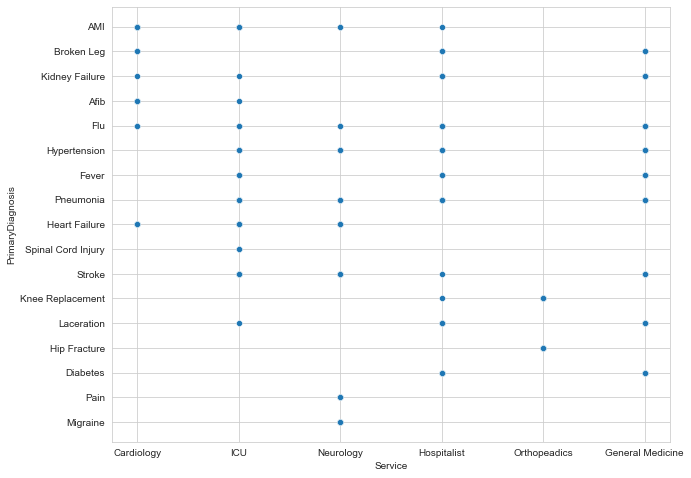

In [30]:
df_K = df_Discharges.copy()
sns.set_style('whitegrid')
sns.scatterplot(data=df_K,x='Service',y='PrimaryDiagnosis')

## 5. Plot a graph by counting the no. of patients based on their reason for visit.

<AxesSubplot:>

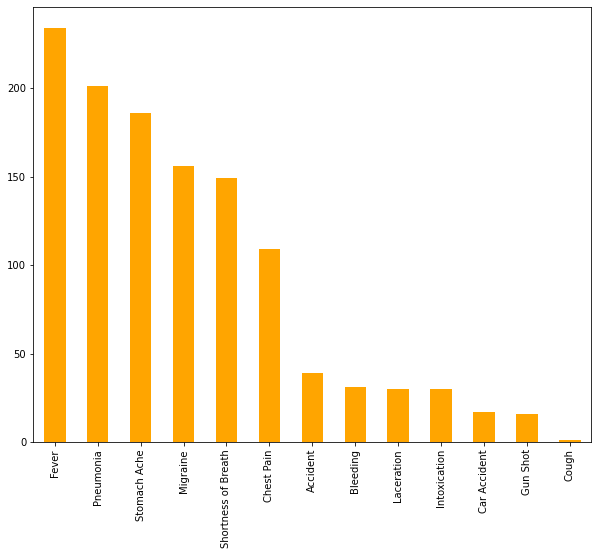

In [29]:
df=pd.read_excel('HospitalDatabase.xlsx', 'EDVisits')
df['ReasonForVisit'].value_counts().plot(kind='bar', color='orange')

## 6. Retrieve the patient ids with abnormal BP range separately for before and above normal (normal range DBP = 80, SBP = 120)

In [16]:
# Retrieve the rows where DBP<80
df=pd.read_csv('HospitalDatabase-AmulateryVisit.csv')
df['BloodPressureDiastolic']<80

0      False
1      False
2      False
3      False
4      False
       ...  
945    False
946    False
947    False
948    False
949    False
Name: BloodPressureDiastolic, Length: 950, dtype: bool

In [17]:
# Retrieve the rows where SBP<120
df['BloodPressureSystolic']<120

0      False
1      False
2      False
3      False
4      False
       ...  
945    False
946    False
947    False
948    False
949    False
Name: BloodPressureSystolic, Length: 950, dtype: bool

## 7. Show analysis and exploration how the age factors with respect to strokes.

In [18]:
workbook_url = 'HospitalDatabase.xlsx'
Patients_df = pd.read_excel(workbook_url,sheet_name='Patients')
Patients_df
Patients_df['DateOfBirth'] = pd.to_datetime(Patients_df['DateOfBirth'])
Patients_df['Year'] = Patients_df['DateOfBirth'].dt.year
Patients_df['Age'] = 2022 - Patients_df['Year']
Patients_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Year,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960,62
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985,37
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976,46
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968,54
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962,60
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986,36
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970,52
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983,39
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963,59


In [19]:
Discharges_df = pd.read_excel(workbook_url,sheet_name='Discharges')
Discharges_df
# Merging Patients and Discharge tables
df_57 = Patients_df.merge(Discharges_df, how = 'outer',indicator=True)
df_57

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Year,Age,AdmissionID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,_merge
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960,62,389.0,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,both
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985,37,635.0,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,both
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976,46,606.0,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,both
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968,54,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962,60,587.0,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986,36,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
957,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970,52,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
958,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983,39,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
959,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963,59,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only


In [20]:
# Dropping all rows that don't have PrimaryDiagnosis value as Stroke
df_57.drop(df_57[df_57['PrimaryDiagnosis'] != 'Stroke'].index, inplace = True)
df_57

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Year,Age,AdmissionID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,_merge
9,10,Granny,Man,1969-09-15 11:20:42.218,Male,White,English,1969,53,355.0,2018-01-01,2018-01-07 20:50:16.780,Transfer,ICU,Stroke,14.787084,0.106645,both
14,14,Gan,Yu,1970-06-02 06:22:54.675,Male,White,Spanish,1970,52,18.0,2018-01-18,2018-01-25 14:43:35.285,Home,General Medicine,Stroke,10.060740,0.253516,both
19,19,Daugherty,Conner,1960-04-04 10:00:34.189,Male,White,Spanish,1960,62,252.0,2018-01-01,2018-01-17 14:13:23.627,Home,Hospitalist,Stroke,15.349671,0.478003,both
35,30,Ala,Halpert,1986-11-26 10:44:22.628,Female,White,Spanish,1986,36,2.0,2018-01-02,2018-01-16 07:25:09.548,Home,General Medicine,Stroke,7.985315,0.212920,both
41,35,Fred,Tye,1966-04-14 06:01:07.169,Female,White,Spanish,1966,56,147.0,2018-01-02,2018-01-18 00:24:01.294,Home,Neurology,Stroke,13.042939,0.351937,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,601,Aurelie,Lerner,1983-07-24 02:55:54.675,Male,Black/African-American,English,1983,39,192.0,2018-02-16,2018-02-28 14:01:18.908,Home,Neurology,Stroke,13.499803,0.299733,both
616,602,Marjie,Walsh,1982-06-12 17:17:14.100,Male,Black/African-American,English,1982,40,47.0,2018-02-16,2018-03-04 04:43:09.738,Home,General Medicine,Stroke,7.245086,0.044968,both
625,611,Adolf,Ormes,1975-12-04 05:13:13.613,Male,Black/African-American,English,1975,47,48.0,2018-02-17,2018-02-24 23:03:41.580,Home,General Medicine,Stroke,6.904901,0.147814,both
656,642,Jerde,Endrizzi,1961-04-30 14:54:37.810,Female,Black/African-American,English,1961,61,102.0,2018-02-18,2018-02-28 08:32:49.644,Home,Neurology,Stroke,10.334429,0.077559,both


<AxesSubplot:xlabel='Age', ylabel='PrimaryDiagnosis'>

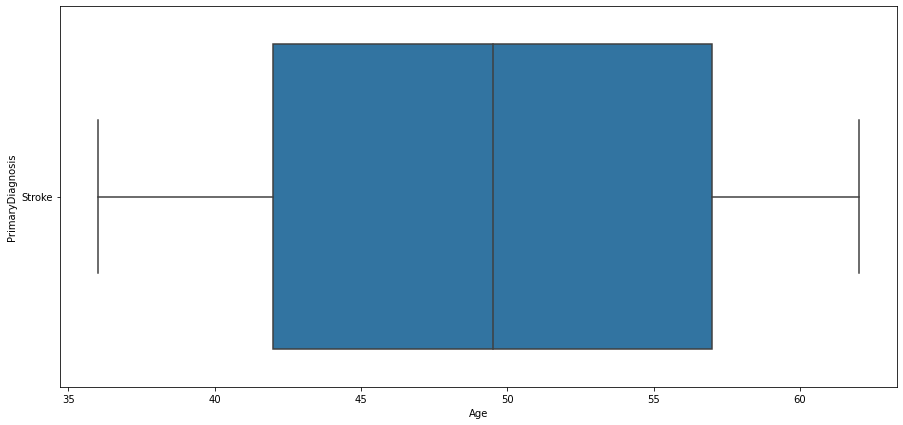

In [21]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df_57,x='Age',y='PrimaryDiagnosis')

<AxesSubplot:xlabel='PrimaryDiagnosis', ylabel='Age'>

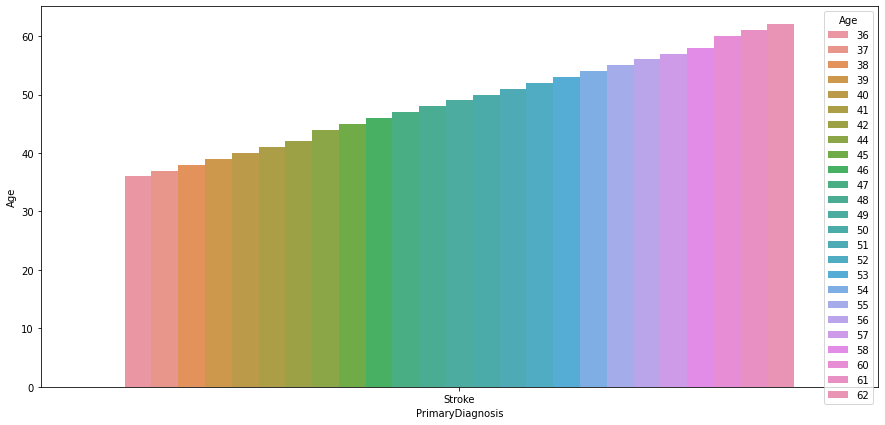

In [22]:
plt.figure(figsize=(15,7))
sns.barplot(data=df_57,x='PrimaryDiagnosis',y='Age', hue='Age')
# This plot will help to analyze how age will affect chances of stroke.

## Insight 1:- People between 36 to 62 tend to have a stroke.

<Figure size 1080x504 with 0 Axes>

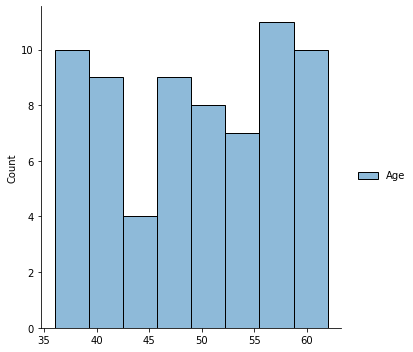

In [23]:
plt.figure(figsize=(15,7))
sns.displot(df_57[['Age','PrimaryDiagnosis']])
# This will plot a distribution plot of variable age

## Insight 2:- People between the range of 55-60 are most prone to have Stroke.

## 8. List of all the patients who did not show up. And the count of all the patients for each reason of visit.

In [24]:
df=pd.read_csv('HospitalDatabase-AmulateryVisit.csv')
df.loc[(df['VisitStatus']=='No Show'),:]

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
0,202,840,29,3/19/2019,3/13/2019,10,Physical,188.0,144.143427,83.044920,No Show
1,436,820,25,3/19/2019,2/24/2019,3,Follow Up,179.0,118.876808,90.309544,No Show
2,794,879,30,4/2/2019,3/19/2019,11,Telemedicine,133.0,98.749563,80.859776,No Show
3,799,884,37,3/3/2019,2/25/2019,4,Telemedicine,132.0,98.001270,82.184737,No Show
4,515,32,26,3/16/2019,2/20/2019,11,Telemedicine,131.0,85.115632,89.192362,No Show
...,...,...,...,...,...,...,...,...,...,...,...
149,414,90,3,2/25/2019,2/17/2019,5,Follow Up,136.0,90.802316,79.426026,No Show
150,507,891,16,1/25/2019,1/14/2019,11,Telemedicine,155.0,112.064259,73.714965,No Show
151,410,90,22,2/21/2019,1/31/2019,1,Follow Up,131.0,80.726116,54.947675,No Show
152,803,888,15,3/7/2019,2/25/2019,8,Telemedicine,173.0,136.377032,58.024363,No Show


In [25]:
df=pd.read_csv('HospitalDatabase-EDVisits.csv')
df.groupby('ReasonForVisit')['EDDisposition'].apply(lambda x: (x=='Admitted').sum()).reset_index(name='count')

,ReasonForVisit,count
0,Accident,39
1,Bleeding,16
2,Car Accident,17
3,Chest Pain,94
4,Cough,0
5,Fever,46
6,Gun Shot,16
7,Intoxication,0
8,Laceration,0
9,Migraine,47


## 9. Find the age ranges for patients based on their primary Diagnosis.

In [27]:
workbook_url = 'HospitalDatabase.xlsx'
Patients_df = pd.read_excel(workbook_url,sheet_name='Patients')
Patients_df
Patients_df['DateOfBirth'] = pd.to_datetime(Patients_df['DateOfBirth'])
Patients_df['Year'] = Patients_df['DateOfBirth'].dt.year
Patients_df['Age'] = 2022 - Patients_df['Year']
Patients_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Year,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960,62
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985,37
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976,46
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968,54
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962,60
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986,36
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970,52
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983,39
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963,59


In [28]:
Discharges_df = pd.read_excel(workbook_url,sheet_name='Discharges')
Discharges_df
# Merging Patients and Discharge tables
df_57 = Patients_df.merge(Discharges_df, how = 'outer',indicator=True)
df_57

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Year,Age,AdmissionID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,_merge
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960,62,389.0,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,both
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985,37,635.0,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,both
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976,46,606.0,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,both
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968,54,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962,60,587.0,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986,36,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
957,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970,52,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
958,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983,39,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
959,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963,59,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only


<AxesSubplot:xlabel='Age', ylabel='PrimaryDiagnosis'>

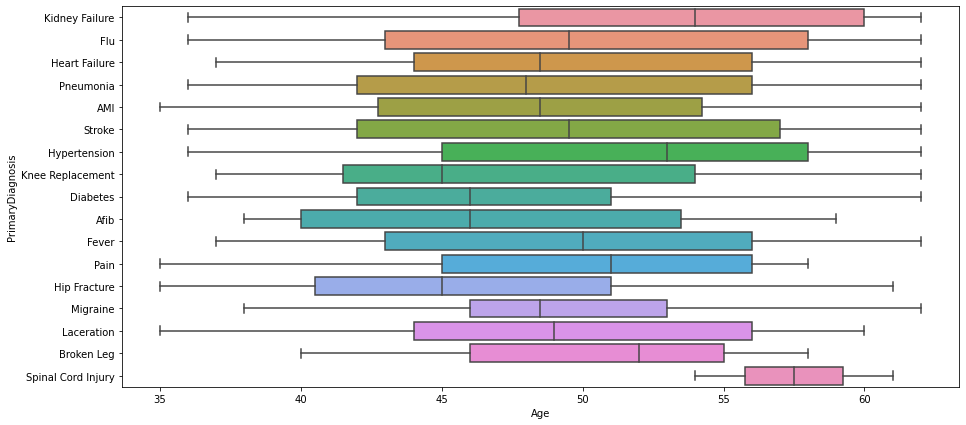

In [29]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df_57,x='Age',y='PrimaryDiagnosis')

## 10. Showing the records of where the ExpectedLos is greater than the difference of the max and min ExpectedLos.

In [30]:
df=pd.read_excel('HospitalDatabase.xlsx', 'Discharges')
Expected_LOS=df['ExpectedLOS']
a=df['ExpectedLOS'].max()
b=df['ExpectedLOS'].min()
df_diff = a-b
primary_diagnosis_list = df.loc[(df['ExpectedLOS'] > df_diff)]
primary_diagnosis_list

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
12,398,134,2018-01-10,2018-01-15 16:43:47.026,Expired,ICU,Pneumonia,16.225126,0.460186
24,368,178,2018-01-14,2018-01-18 13:44:53.072,Expired,ICU,Spinal Cord Injury,15.183750,0.318426
31,369,198,2018-01-15,2018-01-31 14:28:07.437,Expired,ICU,Spinal Cord Injury,15.369330,0.082132
36,406,230,2018-01-18,2018-02-01 20:55:30.903,Expired,Cardiology,Afib,15.212173,0.487404
47,174,352,2018-01-29,2018-02-02 21:21:45.388,Expired,ICU,Pneumonia,16.989907,0.573870
87,295,560,2018-02-13,2018-02-26 18:17:22.826,Expired,Neurology,Heart Failure,16.785926,0.808604
92,297,588,2018-02-15,2018-02-26 14:46:54.780,Expired,Neurology,Stroke,15.958583,0.172149
101,691,709,2018-02-21,2018-03-01 08:44:33.655,Expired,Cardiology,Heart Failure,15.471412,0.362760
110,549,8,2018-01-01,2018-01-07 15:39:25.987,Home,Hospitalist,Pneumonia,16.472257,0.526198
119,252,19,2018-01-01,2018-01-17 14:13:23.627,Home,Hospitalist,Stroke,15.349671,0.478003


## 11. For each visit type show the count of 'No Show'.

In [42]:
df=pd.read_csv('HospitalDatabase-AmulateryVisit.csv')
#df[df['VisitStatus']=='No Show'] 
df[df['VisitStatus']=='No Show'],[df['VisitType'].value_counts]

(     VisitID  PatientMRN  ProviderID DateofVisit DateScheduled  \
 0        202         840          29   3/19/2019     3/13/2019   
 1        436         820          25   3/19/2019     2/24/2019   
 2        794         879          30    4/2/2019     3/19/2019   
 3        799         884          37    3/3/2019     2/25/2019   
 4        515          32          26   3/16/2019     2/20/2019   
 ..       ...         ...         ...         ...           ...   
 149      414          90           3   2/25/2019     2/17/2019   
 150      507         891          16   1/25/2019     1/14/2019   
 151      410          90          22   2/21/2019     1/31/2019   
 152      803         888          15    3/7/2019     2/25/2019   
 153      505         889          14   1/23/2019     1/22/2019   
 
      VisitDepartmentID     VisitType  BloodPressureSystolic  \
 0                   10      Physical                  188.0   
 1                    3     Follow Up                  179.0   
 2

## 12. Calculate years of experience of each provider

In [43]:
ProvidersCopy= df_Providers.copy()
ProvidersCopy['JoinYear'] = ProvidersCopy['ProviderDateOnStaff'].dt.year
currentyear = datetime.now().year
ProvidersCopy['Experience'] = currentyear - ProvidersCopy['JoinYear']
ProvidersCopy

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff,JoinYear,Experience
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000,1993,30
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.695,1993,30
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687,1993,30
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299,1993,30
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.838,1995,28
5,6,Harry Kane,Pediatrics,1995-07-21 03:49:03.310,1995,28
6,7,Barry Bar,Pediatrics,1995-11-21 19:30:38.759,1995,28
7,8,Ted Green,Pediatrics,1996-05-30 06:14:52.539,1996,27
8,9,Ted Black,Pediatrics,1997-02-20 08:01:10.211,1997,26
9,10,Fred Man,Surgery,1998-03-17 01:47:18.794,1998,25


## 13. Count of Visits per month

In [88]:
df_AmbulatoryVisits['VisitMonth'] = df_AmbulatoryVisits['DateofVisit'].dt.month_name()
df_AmbulatoryVisits['VisitCount']=0
df=pd.pivot_table(df_AmbulatoryVisits,index=['VisitMonth','VisitType'],values='VisitCount',aggfunc='count',margins=True)
df

VisitCount
VisitMonth VisitType               
April      Follow Up             81
           New                   57
           Physical              24
           Telemedicine          58
February   Follow Up             90
           New                    5
           Physical              50
           Telemedicine          93
January    Follow Up             30
           New                   39
           Physical              19
           Telemedicine          23
March      Follow Up            123
           New                   16
           Physical             109
           Telemedicine         105
May        Follow Up             12
           New                    8
           Physical               3
           Telemedicine           5
All                             950

## 14. Calculate average years of experience by providerspecialty

In [45]:
df=pd.pivot_table(ProvidersCopy,index=['ProviderSpecialty'],values='Experience',aggfunc='mean',margins=True)
df

,Experience
ProviderSpecialty,
Cardiology,19.125000
Pediatrics,28.555556
PrimaryCare,13.437500
Surgery,24.142857
All,19.850000


## 15. Bar Chart for Patients Gender Distribution based on Race

In [73]:
df_PatientCopy= df_Patients.copy()
df_PatientCopy['BirthYear'] = df_PatientCopy['DateOfBirth'].dt.year
currentyear = datetime.now().year
df_PatientCopy['Age'] = currentyear - df_PatientCopy['BirthYear']
df_PatientCopy

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,BirthYear,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960,63
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985,38
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976,47
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968,55
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962,61
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986,37
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970,53
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983,40
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963,60


In [74]:
query = "SELECT Race,Gender,Count(*) as PatientCount from df_PatientCopy group by Race, Gender"
df=ps.sqldf(query,locals()).sort_values(by='PatientCount', ascending = False)
df

,Race,Gender,PatientCount
1,Black/African-American,Male,336
2,White,Female,271
3,White,Male,201
0,Black/African-American,Female,137


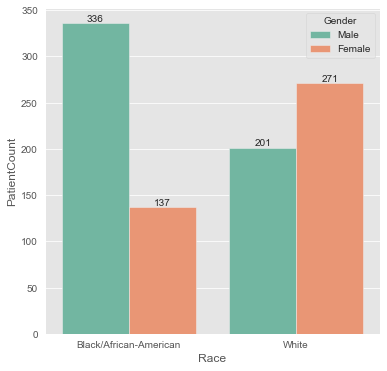

In [76]:
plt.figure(figsize=(6,6))
ax=sns.barplot(data=df, x="Race", y="PatientCount", hue="Gender",palette='Set2')
for container in ax.containers:
    ax.bar_label(container)

## 16. Word Cloud for ReasonForVisit

(-0.5, 699.5, 299.5, -0.5)

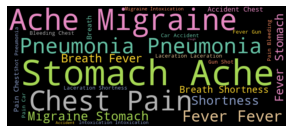

In [7]:
list1 = df_EDVisits['ReasonForVisit'].to_string(index=False)
wordcloud = WordCloud(width=700 , height=300,background_color="black",colormap="Set2").generate(list1)
plt.figure(figsize=(5,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## 17. Wordcloud for the functions used in this hackathon

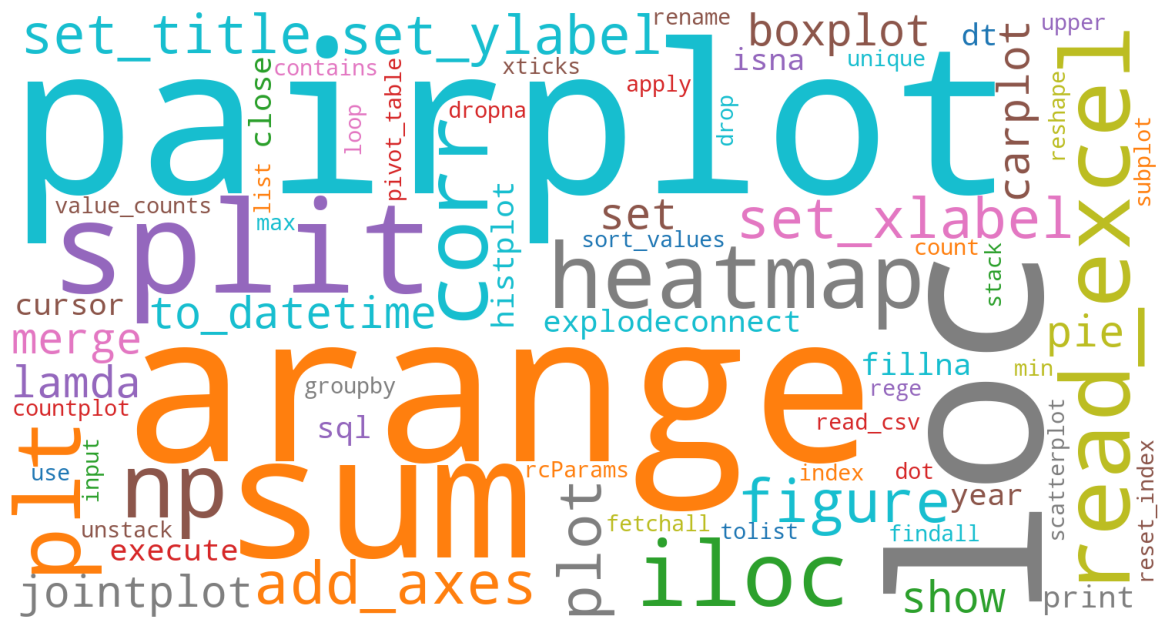

In [13]:
my_list=["read_excel()","pairplot()","heatmap()","corr()","iloc[]","np.arange()","plt.figure()",
          "add_axes()","plot()","set_xlabel()","set_ylabel()","set_title()","to_datetime()","boxplot()","jointplot()",
          "pairplot()","set()","carplot()","merge()","loc[lamda ]","loc()","pie()","show()","explodeconnect()","sql()",
          "execute()","cursor()","print()","close()","isna()","sum()","fillna()","histplot()","dt.year","value_counts()",
          "index()","groupby()","list()","tolist()","stack()","unstack()","count()","max()","sum()","sort_values()","min()",
          "apply()","unique()","reset_index()","split()","countplot()","subplot()","xticks()","for loop","upper()","read_csv",
          "findall()","scatterplot()","fetchall()","rege.split()","arange()","reshape()","dot()",
          "rename()","pivot_table()","contains()","use()","rcParams[]","drop()","input()","dropna()"]
strings=(" ").join(my_list)
wordcloud = WordCloud(width = 1500, height = 800,background_color="white",colormap="tab10").generate(strings)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

## 18. How many providers are providing services to each patient

In [40]:
df=pd.read_excel('HospitalDatabase.xlsx', 'AmbulatoryVisits')
datapd=pd.pivot_table(data=df, index='PatientMRN', values='ProviderID', aggfunc='count').sort_values(by= "ProviderID", ascending=False).rename(columns={"ProviderID": "Provider Count"})
datapd

,Provider Count
PatientMRN,
90,21
891,6
872,6
866,6
867,6
...,...
24,1
25,1
26,1


## 19. Create a figure object and put two axes on it, ax1 and ax2. Located at [0,0,1,1] and [0.2,0.5,.2,.2] respectively.
## Plot (x,y) on both axes. And call your figure object to show it.**Use any x,y set of values to plot the graph. 

Text(0.5, 1.0, 'Zoom')

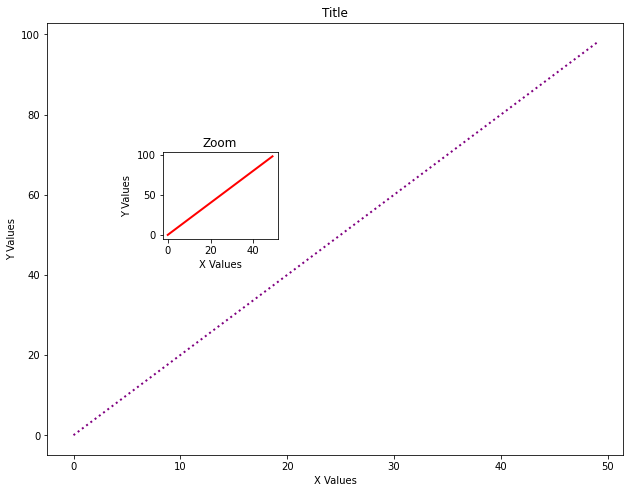

In [14]:
x = np.arange(0,50)
y = x*2

plt.rcParams['figure.figsize']=(8,6)
#plt.figure(figsize=(12,15))
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.2,0.5,0.2,0.2])


ax1.plot(x,y,color = 'purple',ls = ':',lw = 2)
ax1.set_xlabel('X Values')
ax1.set_ylabel('Y Values')
ax1.set_title('Title')

ax2.plot(x,y,color = 'red',lw =2)
ax2.set_xlabel('X Values')
ax2.set_ylabel('Y Values')
ax2.set_title('Zoom')


## 20. Plot a hist plot by using Age and Gender

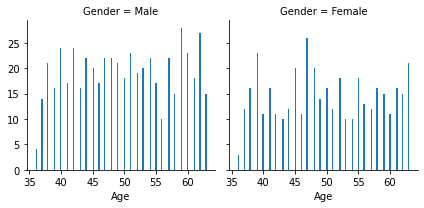

In [16]:
#Patients_df = pd.read_excel("HospitalDatabase.xlsx",'Patients')
Patients_df = pd.read_excel("HospitalDatabase.xlsx","Patients")

# Creating age
Patients_df['DateOfBirth'] = pd.to_datetime(Patients_df['DateOfBirth'])
Patients_df['Year'] = Patients_df['DateOfBirth'].dt.year
Patients_df['Age'] = 2023 - Patients_df['Year']

Patients_df
#plt.figure(figsize=(12,15))
plt.rcParams['figure.figsize']=(8,6)
g = sns.FacetGrid(data=Patients_df,col='Gender')
g.map(plt.hist,'Age',bins = 120)

## 21.Find out the count of Patients in Stomach Ache
## Using EDVisits table


In [19]:
EDV = pd.read_excel("HospitalDatabase.xlsx","EDVisits")
EDV[EDV['ReasonForVisit'] == 'Stomach Ache'].count()

EDVisitID          186
PatientID          186
VisitDate          186
EDDischargeTime    186
Acuity             186
ReasonForVisit     186
EDDisposition      186
dtype: int64

## 22. Plot a dual axis for any x,y values

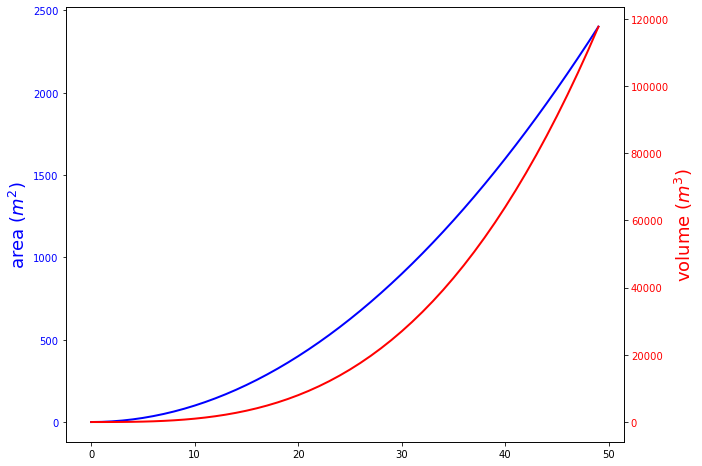

In [17]:
plt.rcParams['figure.figsize']=(10,8)
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

## 23. Draw a plot where x and y axis are Zero

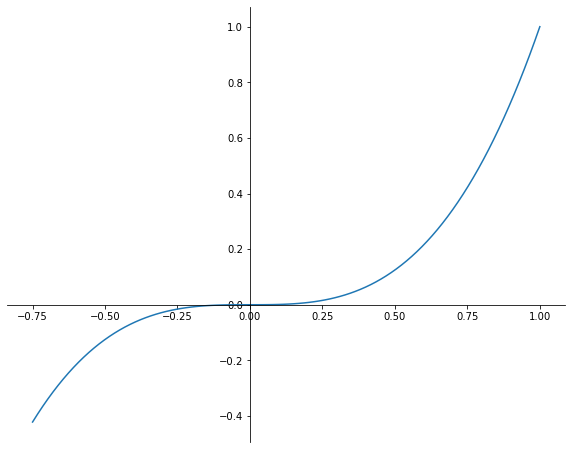

In [18]:
plt.rcParams['figure.figsize']=(10,8)
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

## 24. Draw minimum Three different kind of plots by using matplotlib. By using these values [0,1,2,3,4,5]

In [21]:
%matplotlib inline

Text(0.5, 1.0, 'bar')

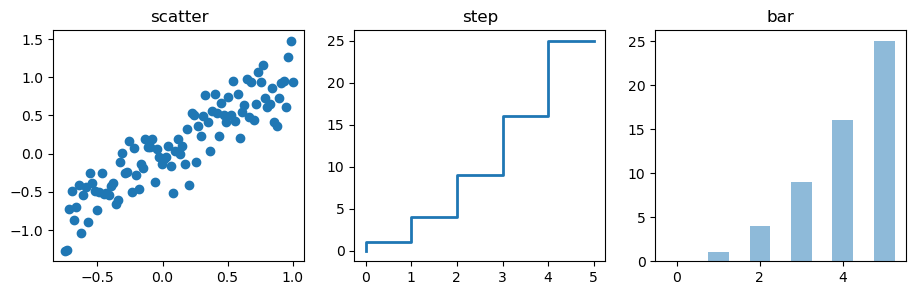

In [24]:
n = np.array([0,1,2,3,4,5])

fig, axes = plt.subplots(1, 3, figsize=(11,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")


## 25. Write a python Program to find the largest number among the three numbers

In [27]:
num1 = input("Enter a your 1st number Num1 : ")
num2 = input("Enter a your 2nd number Num2 : ")
num3 = input("Enter a your 3rd number Num3 : ")


num_frm_user = [num1, num2, num3]
num_frm_user.sort(reverse=True)

num1 = num_frm_user[0]
num2 = num_frm_user[1]
num3 = num_frm_user[2]

if (num1 >= num2) and (num1 >= num3):
   largest = num1
elif (num2 >= num1) and (num2 >= num3):
   largest = num2
else:
   largest = num3

print("The largest number is", largest)

Enter a your 1st number Num1 : 12
Enter a your 2nd number Num2 : 3454
Enter a your 3rd number Num3 : 123
The largest number is 3454


# 26. Display through a donut chart the patient count in the ReAdmissionRegistry.

In [43]:
df_ReAdmissionRegistry = df_ReAdmissionRegistry.copy()
df_donut = df_ReAdmissionRegistry['PrimaryDiagnosis'].value_counts()
df_donut

Pneumonia             177
Flu                    80
Heart Failure          78
Stroke                 68
Diabetes               64
Hypertension           50
AMI                    48
Laceration             29
Hip Fracture           23
Knee Replacement       23
Kidney Failure         20
Fever                  19
Migraine               12
Afib                   11
Broken Leg              9
Pain                    7
Spinal Cord Injury      2
Name: PrimaryDiagnosis, dtype: int64

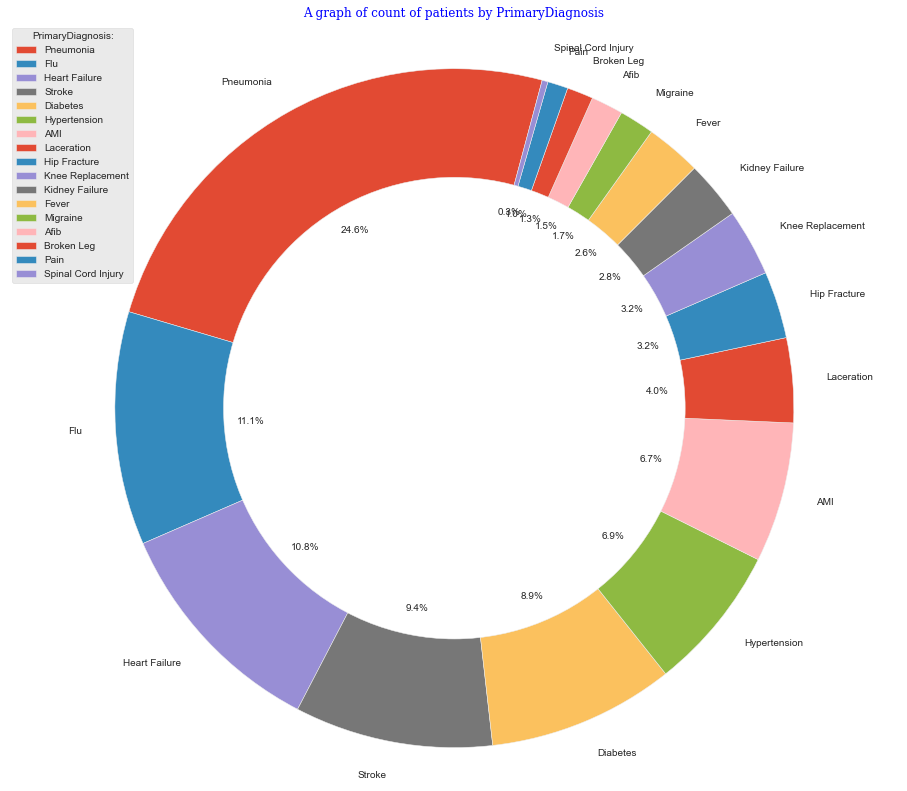

In [78]:
PrimaryDiagnosis = df_ReAdmissionRegistry['PrimaryDiagnosis'].value_counts().index.tolist()
patient_count = df_ReAdmissionRegistry['PrimaryDiagnosis'].value_counts().tolist()

explode = (0.1,0.0,0.0,0.0)

colors = ( "orange", "cyan","indigo", "silver")
font1 = {'family':'serif','color':'blue','size':12}

fig, ax = plt.subplots(figsize =(16, 14))
#explode = explode,shadow = True,
#colors = colors,
plt.style.use('ggplot')
plt.pie(patient_count,labels = PrimaryDiagnosis,startangle =75,autopct='%1.1f%%')
plt.axis('equal')
plt.title('A graph of count of patients by PrimaryDiagnosis', fontdict = font1)
plt.legend(title = "PrimaryDiagnosis:", loc=2)
# upper right: 1, upper left: 2, lower left: 3, lower right: 4,

circle = plt.Circle(xy=(0,0), radius=.68, facecolor='white')
plt.gca().add_artist(circle)
#fig.update_traces(text_info='percent + value')
plt.show()

## 27. New Patients Per Month (sorted by months)

In [92]:
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
df_AmbulatoryVisits['VisitMonth'] = df_AmbulatoryVisits['DateofVisit'].dt.month_name()
df=df_AmbulatoryVisits.groupby('VisitMonth')['VisitType'].apply(lambda x: (x=='New').sum()).reset_index(name='NewPatients')
Sort_Dataframeby_Month(df=df,monthcolumnname='VisitMonth')

,VisitMonth,NewPatients
0,January,39
1,February,5
2,March,16
3,April,57
4,May,8


## 28. Distribution of patients based on language

In [4]:
df=df_Patients.groupby('Language')['PatientID'].count()
df

Language
English    827
Spanish    110
Name: PatientID, dtype: int64

## 29. Count of unique Patients for Ambulatoryvisis

In [15]:
df = df_AmbulatoryVisits['PatientMRN'].nunique()
df

273

## 30 How many patients each Provider is handling?

In [73]:
df=pd.read_excel('HospitalDatabase.xlsx', 'AmbulatoryVisits')
datapd=pd.pivot_table(data=df, index='ProviderID', values='PatientMRN', aggfunc='count').sort_values(by= "PatientMRN", ascending=False).rename(columns={"PatientMRN": "PatientCount"})
datapd

,PatientCount
ProviderID,
1,38
7,31
10,30
13,29
3,28
6,28
4,27
5,27
8,27


### Above table helps to find out Patient -Doctor Distribution and helps hospital to manage patient/doctor ratio 

## 31 Monthly Deaths

In [93]:
df_Discharges['DischargeMonth'] = df_Discharges['DischargeDate'].dt.month_name()
df=df_Discharges.groupby('DischargeMonth')['DischargeDisposition'].apply(lambda x: (x=='Expired').sum()).reset_index(name='DeathCount')
Sort_Dataframeby_Month(df=df,monthcolumnname='DischargeMonth')

,DischargeMonth,DeathCount
0,January,38
1,February,59
2,March,7


### Month of February had highest deaths

## 32. Using Sunburst chart display the providers name by thier provider speciality, considering thier experience.

In [13]:
ProvidersCopy= df_Providers.copy()
ProvidersCopy['JoinYear'] = ProvidersCopy['ProviderDateOnStaff'].dt.year
currentyear = datetime.now().year
ProvidersCopy['Experience'] = currentyear - ProvidersCopy['JoinYear']
ProvidersCopy

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff,JoinYear,Experience
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000,1993,30
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.695,1993,30
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687,1993,30
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299,1993,30
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.838,1995,28
5,6,Harry Kane,Pediatrics,1995-07-21 03:49:03.310,1995,28
6,7,Barry Bar,Pediatrics,1995-11-21 19:30:38.759,1995,28
7,8,Ted Green,Pediatrics,1996-05-30 06:14:52.539,1996,27
8,9,Ted Black,Pediatrics,1997-02-20 08:01:10.211,1997,26
9,10,Fred Man,Surgery,1998-03-17 01:47:18.794,1998,25


In [22]:
ProvidersCopy= df_Providers.copy()
ProvidersCopy['JoinYear'] = ProvidersCopy['ProviderDateOnStaff'].dt.year
currentyear = datetime.now().year
ProvidersCopy['Experience'] = currentyear - ProvidersCopy['JoinYear']
ProvidersCopy

import plotly.express as px
fig = px.sunburst(ProvidersCopy,
                  path=["ProviderSpecialty","ProviderName"],
                  values='Experience',
                  title="The Providers Name by thier experience and speciality in a Sunburst Chart",
                  color="JoinYear",
                  color_continuous_scale='RdBu',
                  width=750, height=750)
fig.update_layout(
    font_family="Courier New",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="blue",
    legend_title_font_color="red"
)
fig.update_xaxes(title_font_family="Arial")
fig.show()

C:\Users\AARAV_AARNA\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\AARAV_AARNA\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

